In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
games = pd.read_csv('../data/games.csv')
GAME1 = games.iloc[0].gameId

In [18]:
week1 = pd.read_csv('../data/week1.csv')
plays = pd.read_csv('../data/plays.csv')

In [19]:
game1_data = week1[week1['gameId'] == GAME1]

In [20]:
PLAY1 = plays.iloc[1].playId
first_play = game1_data[game1_data['playId'] == PLAY1]

In [21]:
first_play_cornerbacks = first_play[first_play['position'] == 'CB']
corners = pd.unique(first_play_cornerbacks['nflId'])

In [22]:
corner1 = first_play_cornerbacks[first_play_cornerbacks['nflId'] == corners[0]]
corner2 = first_play_cornerbacks[first_play_cornerbacks['nflId'] == corners[1]]

In [23]:
freq = np.zeros((120, 54))
xs1 = []
ys1 = []
xs2 = []
ys2 = []

Offense moving  left


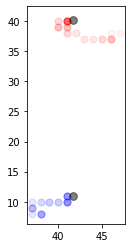

In [24]:
firstXs = [corner1.iloc[0]['x'], corner2.iloc[0]['x']]
firstYs = [corner1.iloc[0]['y'], corner2.iloc[0]['y']]
for index, row in corner1.iterrows():
    x = int(np.floor(row.x))
    y = int(np.floor(row.y))
    freq[x][y] += 1
    xs1.append(x)
    ys1.append(y)
for index, row in corner2.iterrows():
    x = int(np.floor(row.x))
    y = int(np.floor(row.y))
    freq[x][y] += 1
    xs2.append(x)
    ys2.append(y)
ax1 = plt.subplot(131)
ax1.scatter(xs1, ys1, s=50, c='blue', alpha=.05)
ax1.scatter(xs2, ys2, s=50, c='red', alpha=.05)
ax1.scatter(firstXs, firstYs, s=60, c='black', alpha=.5)
# ax1.set_xlim([0, 120])
# ax1.set_ylim([0, 20])
print('Offense moving ', corner1.iloc[0]['playDirection'])

In [25]:
games = pd.read_csv('../data/games.csv')
week1 = pd.read_csv('../data/week1.csv')
plays = pd.read_csv('../data/plays.csv')

['None' 'ball_snap' 'pass_forward' 'pass_arrived' 'pass_outcome_caught'
 'first_contact' 'tackle']


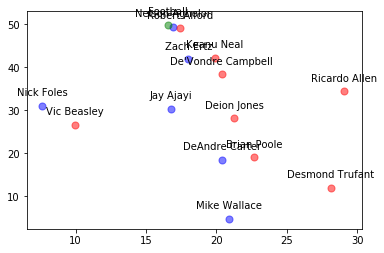

In [29]:
GAME = 2018090600   
PLAY = 320
game1_data = week1[week1['gameId'] == GAME]
play_data = game1_data[game1_data['playId'] == PLAY]
print(pd.unique(play_data['event']))
ball_snap = play_data[play_data['event'] == 'pass_outcome_caught']
xys = []
# ys = []
xs_away = []
xs_home = []
ys_away = []
ys_home = []
labels = []
for index, row in ball_snap.iterrows():
    labels.append(row.displayName)
    xys.append((row.x, row.y))
    if row.team == 'away':
        xs_away.append(row.x)
        ys_away.append(row.y)
    elif row.team == 'home':
        xs_home.append(row.x)
        ys_home.append(row.y)
    else:
        x_foot = [row.x]
        y_foot = [row.y]
plt.scatter(xs_home, ys_home, s=50, c='blue', alpha=.5)
plt.scatter(xs_away, ys_away, s=50, c='red', alpha=.5)
plt.scatter(x_foot, y_foot, s=50, c='green', alpha=.5)
for i in range(len(xys)):
    plt.annotate(labels[i], xys[i], textcoords='offset points', xytext=(0,10), ha='center')

In [27]:
ball_snap

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
714,2018-09-07T01:07:19.700Z,96.10,27.82,0.99,1.14,0.10,327.40,311.41,pass_outcome_caught,310.0,Matt Ryan,2.0,QB,52,away,2018090600,75,left,NaN
715,2018-09-07T01:07:19.700Z,81.74,49.08,7.94,2.37,0.80,0.01,347.39,pass_outcome_caught,79848.0,Malcolm Jenkins,27.0,SS,52,home,2018090600,75,left,NaN
716,2018-09-07T01:07:19.700Z,81.48,50.13,4.93,3.07,0.49,326.77,358.86,pass_outcome_caught,2495454.0,Julio Jones,11.0,WR,52,away,2018090600,75,left,HITCH
717,2018-09-07T01:07:19.700Z,81.41,19.08,4.65,2.84,0.46,355.18,325.16,pass_outcome_caught,2495613.0,Corey Graham,24.0,FS,52,home,2018090600,75,left,NaN
718,2018-09-07T01:07:19.700Z,76.75,36.60,2.82,1.85,0.28,33.31,332.72,pass_outcome_caught,2533040.0,Mohamed Sanu,12.0,WR,52,away,2018090600,75,left,HITCH
719,2018-09-07T01:07:19.700Z,71.81,37.93,6.57,1.61,0.66,21.37,24.91,pass_outcome_caught,2534832.0,Rodney McLeod,23.0,FS,52,home,2018090600,75,left,NaN
720,2018-09-07T01:07:19.700Z,89.30,30.99,3.60,1.45,0.37,293.03,278.13,pass_outcome_caught,2543583.0,Devonta Freeman,24.0,RB,52,away,2018090600,75,left,NaN
721,2018-09-07T01:07:19.700Z,81.51,39.01,5.58,0.92,0.56,348.97,335.03,pass_outcome_caught,2552315.0,Jordan Hicks,58.0,MLB,52,home,2018090600,75,left,NaN
722,2018-09-07T01:07:19.700Z,76.54,14.86,4.91,1.36,0.49,249.15,195.28,pass_outcome_caught,2552689.0,Ronald Darby,21.0,CB,52,home,2018090600,75,left,NaN
723,2018-09-07T01:07:19.700Z,75.30,49.33,5.31,1.22,0.53,57.98,25.69,pass_outcome_caught,2555383.0,Jalen Mills,31.0,CB,52,home,2018090600,75,left,NaN
